In [ ]:
1. Import required libraries and read the dataset.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r"C:\Users\shubham\Downloads\Apps_data+(1).csv")

In [4]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [5]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
data.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
data.shape

(10841, 13)

In [12]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
data.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [14]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
data["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [16]:
data["Content Rating"].unique() #MAture 17+ can be replaced with adults

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [18]:
data["Price"].unique() # '$' this sign can be removed and data can be converted into int format.

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [20]:
data["Type"].unique() #0 can be replaced as free

array(['Free', 'Paid', nan, '0'], dtype=object)

In [24]:
data["Installs"].unique() # can be converted to int format and '+' sign can be removed.

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [26]:
data["Reviews"].unique() # can be converted into int format.

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [27]:
data.shape #befor dropping Duplicates

(10841, 13)

In [29]:
data.duplicated().sum() #No. of Duplicated Rows

483

In [30]:
data.drop_duplicates(inplace=True)

In [31]:
data.shape # After dropping Duplicates

(10358, 13)

In [46]:
data["Category"].nunique() # it has 34 unique values

33

In [45]:
data["Category"].value_counts()

FAMILY                 1943
GAME                   1296
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [34]:
data["Category"] = data["Category"].replace("VIDEO_PLAYERS" , "GAME")

In [ ]:
Category 1.9 # dropping the row

In [58]:
data[data["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [57]:
data.drop(labels=10472 , inplace=True) #row has been dropped 

In [91]:
data["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [92]:
data["Rating"].isna().sum() #No. of missing rows 

1465

In [95]:
data.dropna(inplace=True)

In [69]:
data.shape

(10357, 13)

In [96]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [97]:
data['Rating_category'] = data["Rating"].apply(lambda x : "High" if x > 3.5 else "Low")

In [98]:
data["Rating_category"].unique()

array(['High', 'Low'], dtype=object)

<Axes: xlabel='Rating_category', ylabel='Count'>

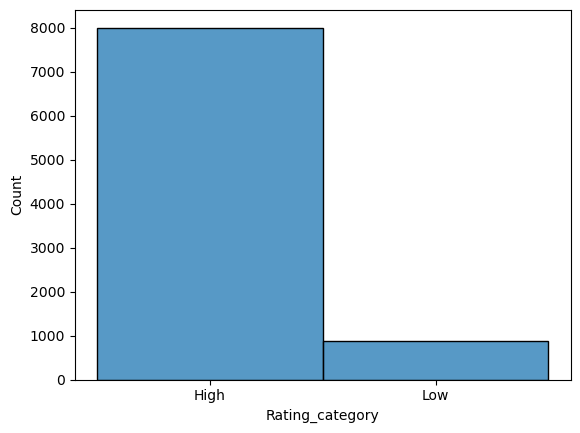

In [102]:
sns.histplot(data=data, x= "Rating_category")

In [ ]:
# We can clearly see that Ratings which are labeled has high are appearing multiple times as compared to "Low" Rating 
Data is positively skewed.

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         879.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

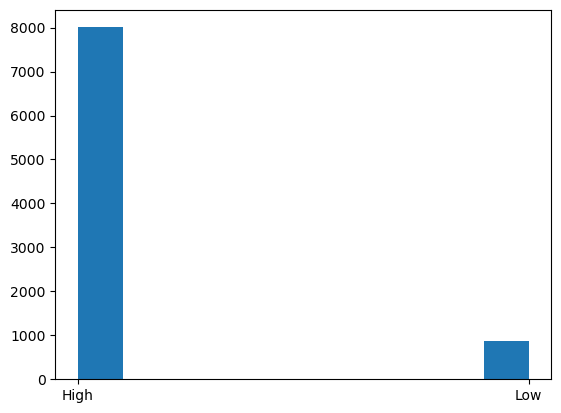

In [103]:
plt.hist(data["Rating_category"])

In [109]:
data["Reviews"] = data["Reviews"].astype(float)

<Axes: xlabel='Reviews'>

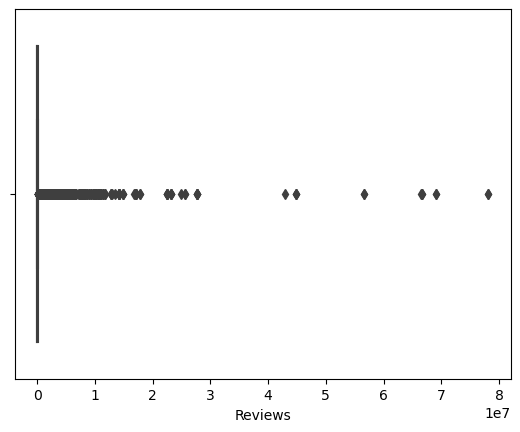

In [121]:
sns.boxplot(data=data , x ="Reviews") #before dropping outliers

In [110]:
data["Reviews"]

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 8886, dtype: float64

In [115]:
data["Reviews"].nunique()

5990

In [116]:
Q1 = data['Reviews'].quantile(0.25)
Q3 = data['Reviews'].quantile(0.75)
IQR = Q3 - Q1

In [117]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [119]:
outliers = data[(data['Reviews'] < lower) | (data['Reviews'] > upper)]

In [120]:
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,High
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,High
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,High
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920.0,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378.0,4.4M,"10,000,000+",Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up,High
10781,Modern Strike Online,GAME,4.3,834117.0,44M,"10,000,000+",Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,High
10784,Big Hunter,GAME,4.3,245455.0,84M,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,High
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223.0,24M,"1,000,000+",Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up,High


In [ ]:
#1555 outliers are present in data.

In [122]:
data['Reviews'] = np.log1p(data['Reviews'])

In [123]:
data["Reviews"]

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8886, dtype: float64

<Axes: xlabel='Reviews'>

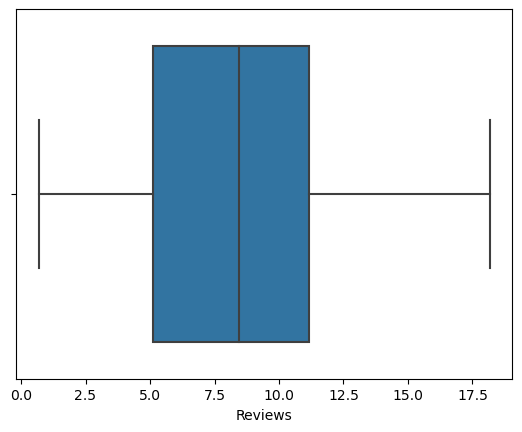

In [126]:
sns.boxplot(data=data , x ="Reviews") #here we can see outliers all ommited

In [176]:
data = data[~((data['Size'] == 'Varies with device'))]

In [178]:
data[data["Size"]== 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category


In [179]:
data["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7418, dtype: object

In [183]:
data['Size'] = data['Size'].str.replace('M', '000000').str.replace('K', '000').str.replace('k',"000")

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\1194656797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Size'] = data['Size'].str.replace('M', '000000').str.replace('K', '000').str.replace('k',"000")


In [184]:
data["Size"]

0         19000000
1         14000000
2        8.7000000
3         25000000
4        2.8000000
           ...    
10833       619000
10834    2.6000000
10836     53000000
10837    3.6000000
10840     19000000
Name: Size, Length: 7418, dtype: object

In [185]:
data["Size"] = data["Size"].astype(float)

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\2775567678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Size"] = data["Size"].astype(float)


In [190]:
data["Installs"] = data["Installs"].str.replace("+" , "").str.replace("," , "")

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\62683345.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = data["Installs"].str.replace("+" , "").str.replace("," , "")
C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\62683345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Installs"] = data["Installs"].str.replace("+" , "").str.replace("," , "")


In [191]:
data["Installs"] = data["Installs"].astype(float)

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\1368493811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Installs"] = data["Installs"].astype(float)


In [192]:
data["Installs"]

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10833        1000.0
10834         500.0
10836        5000.0
10837         100.0
10840    10000000.0
Name: Installs, Length: 7418, dtype: float64

In [195]:
data["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [196]:
data["Price"] = data["Price"].str.replace("$" , "")

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\1813442370.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Price"] = data["Price"].str.replace("$" , "")
C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\1813442370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price"] = data["Price"].str.replace("$" , "")


In [197]:
data["Price"] = data["Price"].astype(float)

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\1603096138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price"] = data["Price"].astype(float)


In [199]:
data["Price"].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [200]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [201]:
data = data.drop(columns=['Rating' , 'App','Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

In [202]:
data.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [203]:
data.dtypes

Category            object
Reviews            float64
Size               float64
Installs           float64
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

In [205]:
data["Type"].nunique()

2

In [207]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [213]:
data["Content Rating"] = data["Content Rating"].str.replace("Mature 18+" ,'Adults only 18' )

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\4206893351.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Content Rating"] = data["Content Rating"].str.replace("Mature 18+" ,'Adults only 18' )


In [209]:
data["Content Rating"] = data["Content Rating"].str.replace('Everyone 10+', 'Teen')

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\2363811.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Content Rating"] = data["Content Rating"].str.replace('Everyone 10+', 'Teen')


In [216]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Adults only 18', 'Unrated'], dtype=object)

In [215]:
data["Content Rating"] = data["Content Rating"].str.replace("+" ,'' )

C:\Users\shubham\AppData\Local\Temp\ipykernel_18872\3203406047.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Content Rating"] = data["Content Rating"].str.replace("+" ,'' )


In [ ]:
13. Encode the categorical columns.


In [217]:
data.dtypes

Category            object
Reviews            float64
Size               float64
Installs           float64
Type                object
Price              float64
Content Rating      object
Rating_category     object
dtype: object

In [218]:
df_dummy= pd.get_dummies(data=data , columns=["Category" ,"Type","Content Rating","Rating_category"],drop_first=True,)

In [219]:
df_dummy

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Teen,Content Rating_Unrated,Rating_category_Low
0,5.075174,19000000.0,10000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6.875232,14000000.0,500000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,11.379520,8.7,5000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,12.281389,25000000.0,50000000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6.875232,2.8,100000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.806662,619000.0,1000.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10834,2.079442,2.6,500.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10836,3.663562,53000000.0,5000.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10837,1.609438,3.6,100.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [221]:
data.tail(5)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
10833,BOOKS_AND_REFERENCE,3.806662,619000.0,1000.0,Free,0.0,Everyone,High
10834,FAMILY,2.079442,2.6,500.0,Free,0.0,Everyone,High
10836,FAMILY,3.663562,53000000.0,5000.0,Free,0.0,Everyone,High
10837,FAMILY,1.609438,3.6,100.0,Free,0.0,Everyone,High
10840,LIFESTYLE,12.894981,19000000.0,10000000.0,Free,0.0,Everyone,High


In [222]:
from sklearn.preprocessing import LabelEncoder

In [224]:
le = LabelEncoder()

In [225]:
data_encoded = le.fit_transform(data["Category"])

In [227]:
data_encoded = le.fit_transform(data["Type"])

In [228]:
data_encoded = le.fit_transform(data["Content Rating"])

In [229]:
data_encoded = le.fit_transform(data["Rating_category"])

In [230]:
data_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [233]:
Y = df_dummy["Rating_category_Low"]

In [234]:
X = df_dummy.loc[:,"Reviews": "Content Rating_Unrated"]

In [235]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y)

In [236]:
X_train

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Teen,Content Rating_Unrated
4368,11.174189,49000000.0,1000000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1627,11.471113,33000000.0,10000000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8802,9.867446,5.1,1000000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1592,7.707962,15000000.0,100000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4372,4.962845,6.2,10000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,7.383368,39000000.0,100000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1824,11.700177,77000000.0,10000000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5038,5.351858,18000000.0,10000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6675,9.989895,44000000.0,1000000.0,0.99,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [237]:
X_test

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Teen,Content Rating_Unrated
7088,2.833213,5.2,500.0,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2566,10.148901,31000000.0,5000000.0,0.00,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3615,7.570959,38000000.0,100000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2530,2.079442,2.7,1000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5479,2.397895,73000000.0,100.0,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9720,6.120297,27000000.0,10000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7743,5.407172,15000000.0,10000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3791,11.247370,4.6,1000000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5562,3.135494,90000000.0,5000.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [238]:
Y_train

4368    0
1627    0
8802    1
1592    0
4372    0
       ..
1329    0
1824    0
5038    0
6675    0
5911    0
Name: Rating_category_Low, Length: 5563, dtype: uint8

In [239]:
Y_test

7088    1
2566    0
3615    0
2530    0
5479    1
       ..
9720    0
7743    0
3791    0
5562    0
4476    0
Name: Rating_category_Low, Length: 1855, dtype: uint8

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
ss = StandardScaler()

In [246]:
df_dummy_std =ss.fit_transform(df_dummy)

In [ ]:
#using StandardScalor 

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
MinMax = MinMaxScaler()

In [249]:
df_dummy_MinMax_std = MinMax.fit_transform(df_dummy)

In [ ]:
#Using MinMax Scalor